In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv("Clean_Data.csv")
df.head()

,Time,Call Count,Temperature,Perception,Date,Hour,Day,Season,AQI PM2.5
0,2021-01-14 14:00:00,6,9.4,0.0,2021-01-14,14,4,Winter,11.9
1,2021-01-14 15:00:00,0,10.3,0.0,2021-01-14,15,4,Winter,7.5
2,2021-01-14 16:00:00,1,10.4,0.0,2021-01-14,16,4,Winter,9.0
3,2021-01-14 17:00:00,3,9.4,0.0,2021-01-14,17,4,Winter,15.5
4,2021-01-14 18:00:00,3,8.0,0.0,2021-01-14,18,4,Winter,22.2


In [2]:
df.columns

Index(['Time', 'Call Count', 'Temperature', 'Perception', 'Date', 'Hour',
       'Day', 'Season', 'AQI PM2.5'],
      dtype='object')

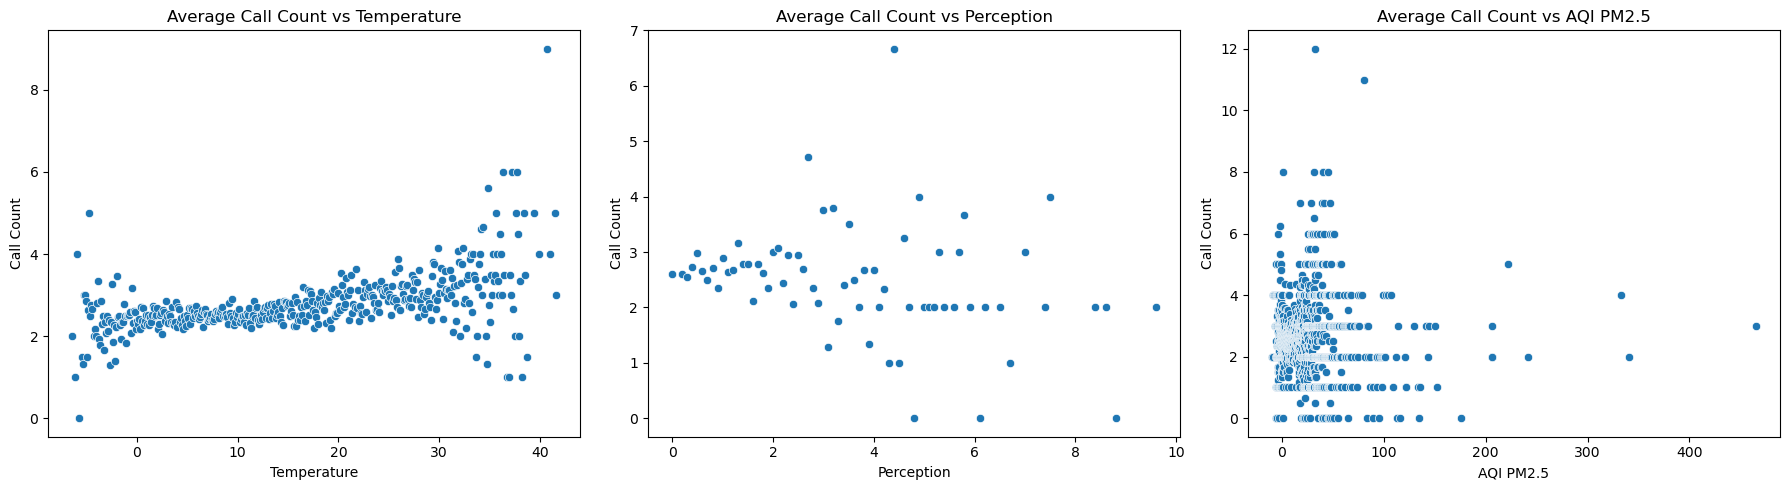

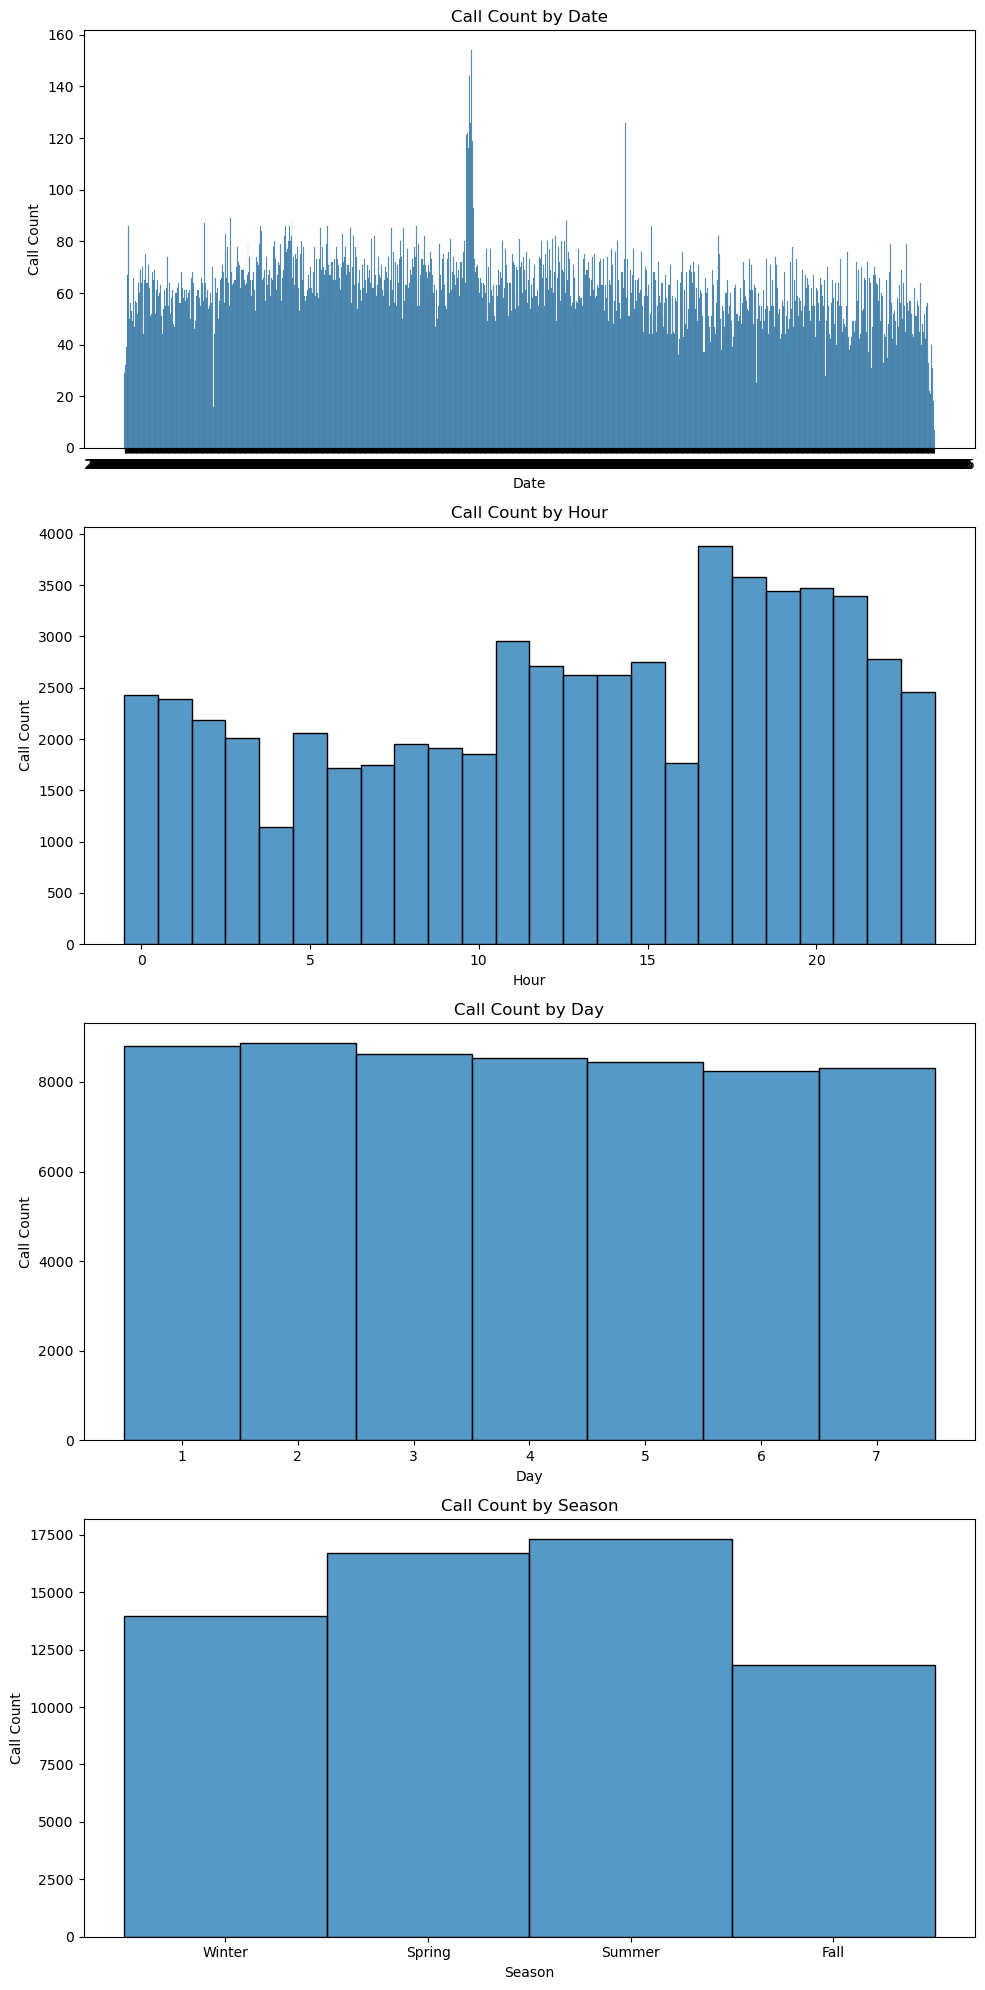

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_vars = ['Temperature', 'Perception', 'AQI PM2.5']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_vars), figsize=(18, 5))

for i, var in enumerate(continuous_vars):
    df_grouped = df.groupby(var)['Call Count'].mean().reset_index()
    sns.scatterplot(data=df_grouped, x=var, y='Call Count', ax=axes[i])
    
    axes[i].set_title(f'Average Call Count vs {var}')

plt.tight_layout()
plt.show()


discrete_vars = ['Date', 'Hour', 'Day', 'Season']
fig, axes = plt.subplots(nrows=len(discrete_vars), ncols=1, figsize=(10, 20))
for i, var in enumerate(discrete_vars):
    sns.histplot(data=df, x=var, weights='Call Count', discrete=True, ax=axes[i])
    axes[i].set_title(f'Call Count by {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Call Count')
plt.tight_layout()
plt.show()

In [12]:
season_mapping = {'Winter': 2, 'Spring': 3, 'Summer': 4, 'Fall': 5}

df['Season'] = df['Season'].map(season_mapping)
df.head()

,Time,Call Count,Temperature,Perception,Date,Hour,Day,Season,AQI PM2.5
0,2021-01-14 14:00:00,6,9.4,0.0,2021-01-14,14,4,2,11.9
1,2021-01-14 15:00:00,0,10.3,0.0,2021-01-14,15,4,2,7.5
2,2021-01-14 16:00:00,1,10.4,0.0,2021-01-14,16,4,2,9.0
3,2021-01-14 17:00:00,3,9.4,0.0,2021-01-14,17,4,2,15.5
4,2021-01-14 18:00:00,3,8.0,0.0,2021-01-14,18,4,2,22.2


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

categorical_vars = ['Hour', 'Day', 'Season']

continuous_vars = ['Temperature', 'Perception', 'AQI PM2.5']

dfs = []

for var in categorical_vars:
    grouped_df = df.groupby(var)['Call Count'].mean().reset_index()
    grouped_df.columns = [var, 'Average Call Count']
    dfs.append(grouped_df)

for var in continuous_vars:
    num_bins = min(100, len(df[var].unique()))
    
    _, bins = pd.qcut(df[var], q=num_bins, retbins=True, duplicates='drop')
    
    labels = [f"{bins[i]:.2f}" for i in range(len(bins)-1)]
    df[f"{var} Binned"] = pd.cut(df[var], bins=bins, labels=labels, include_lowest=True)
    
    grouped_df = df.groupby(f"{var} Binned")['Call Count'].mean().reset_index()
    grouped_df.columns = [var, 'Average Call Count']
    dfs.append(grouped_df)

dfs[5].dtypes

AQI PM2.5             category
Average Call Count     float64
dtype: object

Analysis for Hour:
Descriptive Statistics:
count    24.000000
mean      2.610940
std       0.730378
min       1.195812
25%       2.037698
50%       2.562067
75%       2.955811
max       4.051202
Name: Average Call Count, dtype: float64

Spearman's Correlation: 0.6391304347826086, p-value: 0.0007735907278482088
OLS Linear Regression Summary:
                               OLS Regression Results                              
Dep. Variable:     Q("Average Call Count")   R-squared:                       0.410
Model:                                 OLS   Adj. R-squared:                  0.383
Method:                      Least Squares   F-statistic:                     15.26
Date:                     Mon, 10 Jun 2024   Prob (F-statistic):           0.000757
Time:                             23:55:39   Log-Likelihood:                -19.679
No. Observations:                       24   AIC:                             43.36
Df Residuals:                           22   BIC:                    

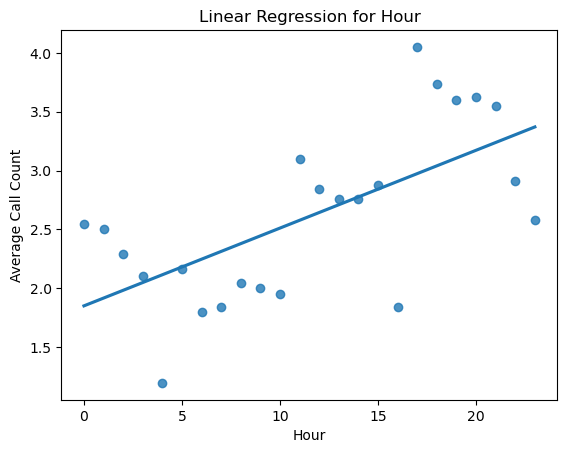

Optimization terminated successfully.
         Current function value: 0.237846
         Iterations 8
OLS Logistic Regression Summary:
                              Logit Regression Results                             
Dep. Variable:     Q("Call Volume Binary")   No. Observations:                   24
Model:                               Logit   Df Residuals:                       22
Method:                                MLE   Df Model:                            1
Date:                     Mon, 10 Jun 2024   Pseudo R-squ.:                  0.6569
Time:                             23:55:39   Log-Likelihood:                -5.7083
converged:                            True   LL-Null:                       -16.636
Covariance Type:                 nonrobust   LLR p-value:                 2.941e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.5913      2.907   

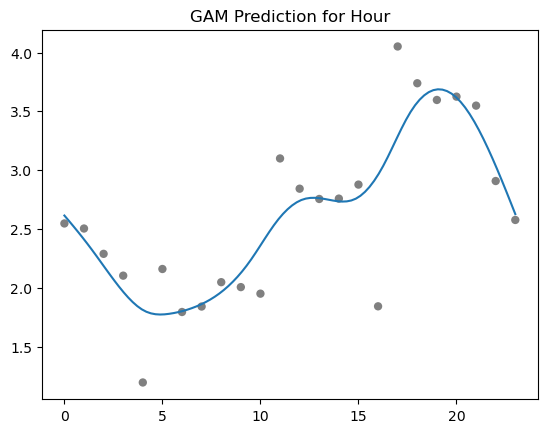

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      7.9161
Link Function:                     IdentityLink Log Likelihood:                                   -25.2175
Number of Samples:                           24 AIC:                                               68.2671
                                                AICc:                                              80.8221
                                                GCV:                                                0.4239
                                                Scale:                                              0.1832
                                                Pseudo R-Squared:                                   0.7598
Feature Function                  Lam

/var/folders/mh/myp6j6d523x6nqr_zzg5ctdw0000gn/T/ipykernel_3355/1093989974.py:60: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


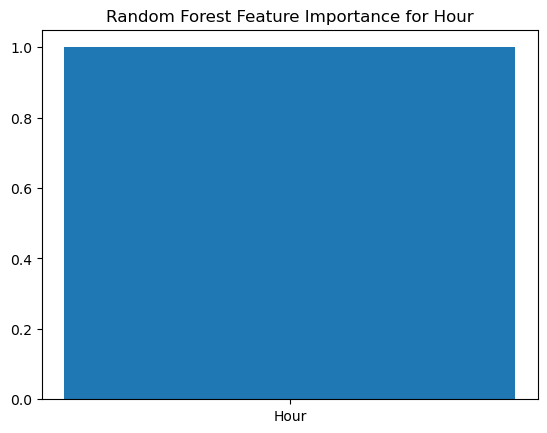



Variable 'Day' not found in the DataFrame. Skipping...
Variable 'Season' not found in the DataFrame. Skipping...
Variable 'Temperature' not found in the DataFrame. Skipping...
Variable 'Perception' not found in the DataFrame. Skipping...
Variable 'AQI PM2.5' not found in the DataFrame. Skipping...
Variable 'Hour' not found in the DataFrame. Skipping...
Analysis for Day:
Descriptive Statistics:
count    7.000000
mean     2.611349
std      0.059632
min      2.528817
25%      2.572461
50%      2.613870
75%      2.653964
max      2.683908
Name: Average Call Count, dtype: float64

Spearman's Correlation: -0.8928571428571429, p-value: 0.006807187408935392
OLS Linear Regression Summary:
                               OLS Regression Results                              
Dep. Variable:     Q("Average Call Count")   R-squared:                       0.862
Model:                                 OLS   Adj. R-squared:                  0.835
Method:                      Least Squares   F-statistic:

/Users/davidmitrovcanmorgan/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


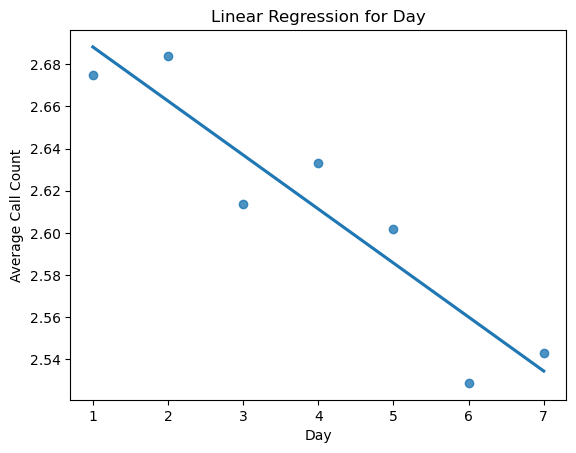

Optimization terminated successfully.
         Current function value: 0.355880
         Iterations 7
OLS Logistic Regression Summary:
                              Logit Regression Results                             
Dep. Variable:     Q("Call Volume Binary")   No. Observations:                    7
Model:                               Logit   Df Residuals:                        5
Method:                                MLE   Df Model:                            1
Date:                     Mon, 10 Jun 2024   Pseudo R-squ.:                  0.4789
Time:                             23:55:39   Log-Likelihood:                -2.4912
converged:                            True   LL-Null:                       -4.7804
Covariance Type:                 nonrobust   LLR p-value:                   0.03238
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3614      3.330   

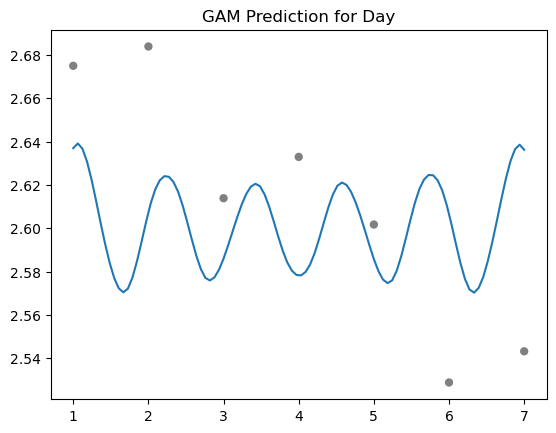

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      1.0169
Link Function:                     IdentityLink Log Likelihood:                                   -655.867
Number of Samples:                            7 AIC:                                             1315.7678
                                                AICc:                                            1318.8231
                                                GCV:                                                0.0059
                                                Scale:                                              0.0044
                                                Pseudo R-Squared:                                  -0.2202
Feature Function                  Lam

/var/folders/mh/myp6j6d523x6nqr_zzg5ctdw0000gn/T/ipykernel_3355/1093989974.py:60: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


Random Forest Mean Squared Error: 0.003689450469454353


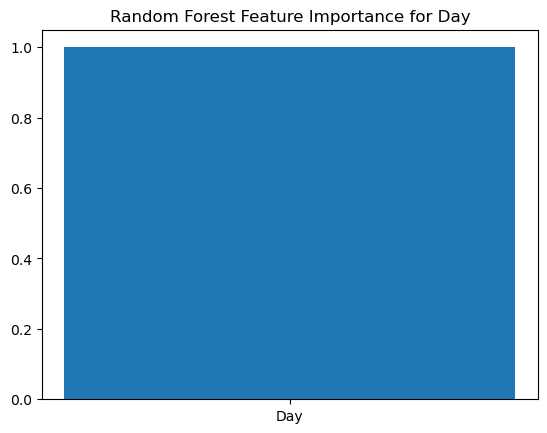



Variable 'Season' not found in the DataFrame. Skipping...
Variable 'Temperature' not found in the DataFrame. Skipping...
Variable 'Perception' not found in the DataFrame. Skipping...
Variable 'AQI PM2.5' not found in the DataFrame. Skipping...
Variable 'Hour' not found in the DataFrame. Skipping...
Variable 'Day' not found in the DataFrame. Skipping...
Analysis for Season:
Descriptive Statistics:
count    4.000000
mean     2.612120
std      0.022681
min      2.587528
25%      2.595598
50%      2.613751
75%      2.630273
max      2.633452
Name: Average Call Count, dtype: float64

Spearman's Correlation: 1.0, p-value: 0.0
OLS Linear Regression Summary:
                               OLS Regression Results                              
Dep. Variable:     Q("Average Call Count")   R-squared:                       0.922
Model:                                 OLS   Adj. R-squared:                  0.883
Method:                      Least Squares   F-statistic:                     23.64
Dat

/Users/davidmitrovcanmorgan/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


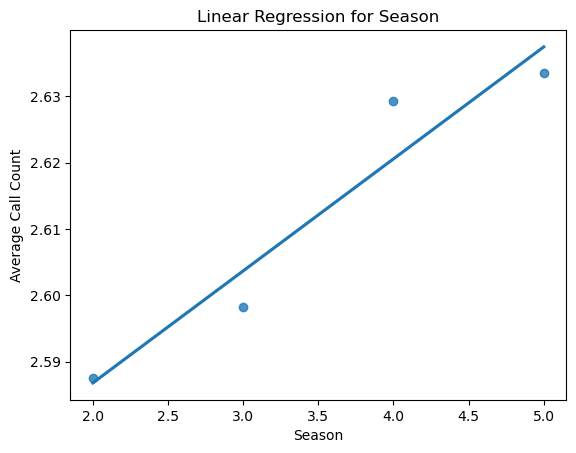

/Users/davidmitrovcanmorgan/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


         Current function value: 0.000000
         Iterations: 35
OLS Logistic Regression Summary:
                              Logit Regression Results                             
Dep. Variable:     Q("Call Volume Binary")   No. Observations:                    4
Model:                               Logit   Df Residuals:                        2
Method:                                MLE   Df Model:                            1
Date:                     Mon, 10 Jun 2024   Pseudo R-squ.:                   1.000
Time:                             23:55:40   Log-Likelihood:            -1.3147e-09
converged:                           False   LL-Null:                       -2.7726
Covariance Type:                 nonrobust   LLR p-value:                   0.01853
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -147.9286   1.93e+05     -0.001      0.999   -3.79e+05  

/Users/davidmitrovcanmorgan/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/davidmitrovcanmorgan/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/davidmitrovcanmorgan/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/davidmitrovcanmorgan/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may no

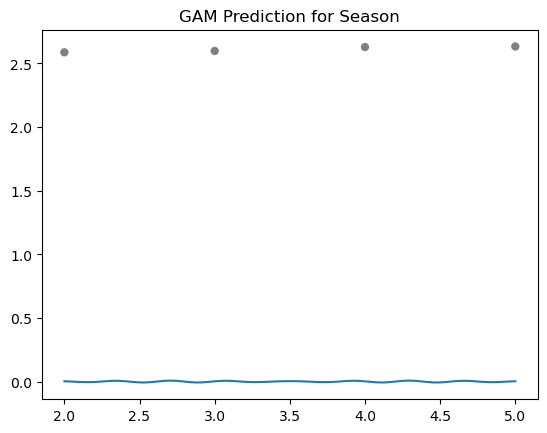

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      0.0082
Link Function:                     IdentityLink Log Likelihood:                                   -11.6463
Number of Samples:                            4 AIC:                                                25.309
                                                AICc:                                              27.3421
                                                GCV:                                                6.8425
                                                Scale:                                              6.8172
                                                Pseudo R-Squared:                              -17631.2931
Feature Function                  Lam

/var/folders/mh/myp6j6d523x6nqr_zzg5ctdw0000gn/T/ipykernel_3355/1093989974.py:60: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


Random Forest Mean Squared Error: 0.00011491735997158315


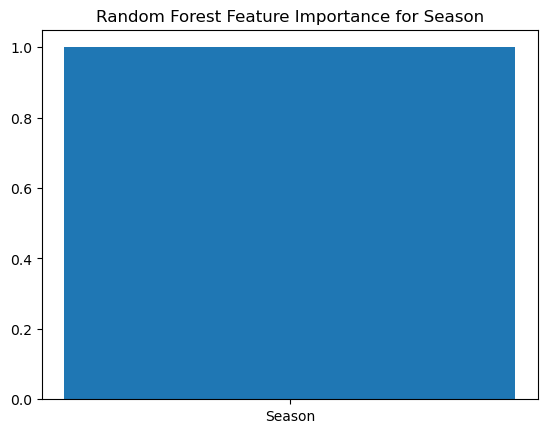



Variable 'Temperature' not found in the DataFrame. Skipping...
Variable 'Perception' not found in the DataFrame. Skipping...
Variable 'AQI PM2.5' not found in the DataFrame. Skipping...
Variable 'Hour' not found in the DataFrame. Skipping...
Variable 'Day' not found in the DataFrame. Skipping...
Variable 'Season' not found in the DataFrame. Skipping...
Analysis for Temperature:
Descriptive Statistics:
count    100.000000
mean       2.613895
std        0.227290
min        2.224390
25%        2.453174
50%        2.556552
75%        2.691407
max        3.409910
Name: Average Call Count, dtype: float64

Spearman's Correlation: 0.7564304509225548, p-value: 9.009565124120951e-20
OLS Linear Regression Summary:
                               OLS Regression Results                              
Dep. Variable:     Q("Average Call Count")   R-squared:                       0.720
Model:                                 OLS   Adj. R-squared:                  0.717
Method:                      Leas

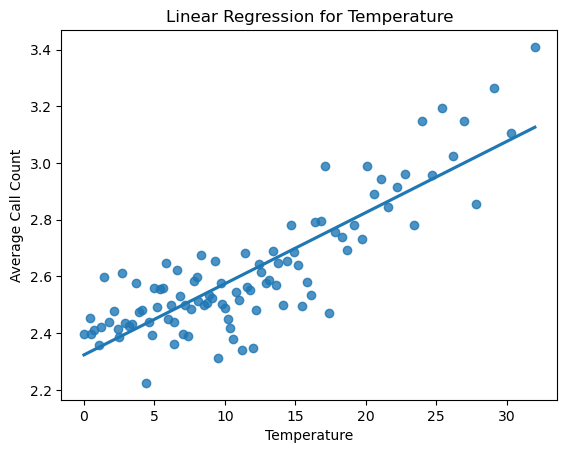

Optimization terminated successfully.
         Current function value: 0.475427
         Iterations 6
OLS Logistic Regression Summary:
                              Logit Regression Results                             
Dep. Variable:     Q("Call Volume Binary")   No. Observations:                  100
Model:                               Logit   Df Residuals:                       98
Method:                                MLE   Df Model:                            1
Date:                     Mon, 10 Jun 2024   Pseudo R-squ.:                  0.3141
Time:                             23:55:40   Log-Likelihood:                -47.543
converged:                            True   LL-Null:                       -69.315
Covariance Type:                 nonrobust   LLR p-value:                 4.145e-11
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.

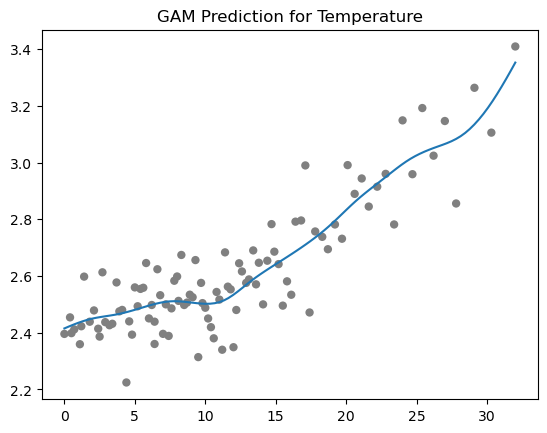

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      9.8384
Link Function:                     IdentityLink Log Likelihood:                                 -3737.5933
Number of Samples:                          100 AIC:                                             7496.8634
                                                AICc:                                            7499.7741
                                                GCV:                                                0.0133
                                                Scale:                                               0.011
                                                Pseudo R-Squared:                                    0.806
Feature Function                  Lam

/var/folders/mh/myp6j6d523x6nqr_zzg5ctdw0000gn/T/ipykernel_3355/1093989974.py:60: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


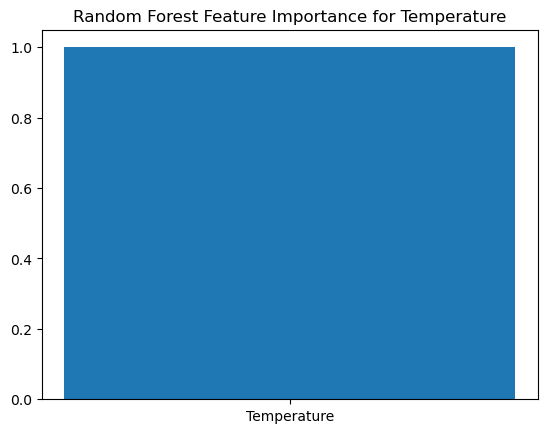



Variable 'Perception' not found in the DataFrame. Skipping...
Variable 'AQI PM2.5' not found in the DataFrame. Skipping...
Variable 'Hour' not found in the DataFrame. Skipping...
Variable 'Day' not found in the DataFrame. Skipping...
Variable 'Season' not found in the DataFrame. Skipping...
Variable 'Temperature' not found in the DataFrame. Skipping...
Analysis for Perception:
Descriptive Statistics:
count    7.000000
mean     2.657350
std      0.099410
min      2.557692
25%      2.590482
50%      2.633540
75%      2.696788
max      2.835681
Name: Average Call Count, dtype: float64

Spearman's Correlation: 0.39285714285714296, p-value: 0.38331687042697266
OLS Linear Regression Summary:
                               OLS Regression Results                              
Dep. Variable:     Q("Average Call Count")   R-squared:                       0.012
Model:                                 OLS   Adj. R-squared:                 -0.186
Method:                      Least Squares   F-stat

/Users/davidmitrovcanmorgan/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


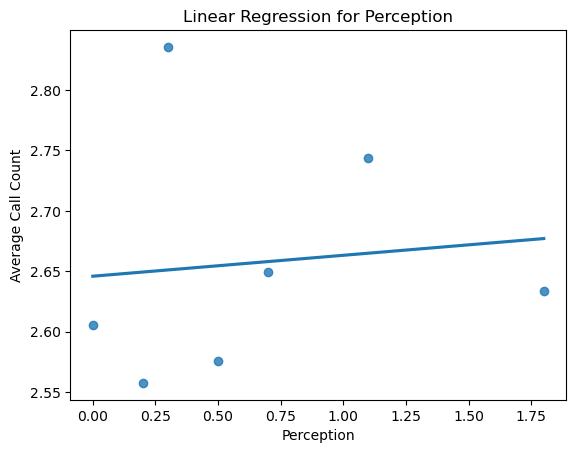

Optimization terminated successfully.
         Current function value: 0.680817
         Iterations 4
OLS Logistic Regression Summary:
                              Logit Regression Results                             
Dep. Variable:     Q("Call Volume Binary")   No. Observations:                    7
Model:                               Logit   Df Residuals:                        5
Method:                                MLE   Df Model:                            1
Date:                     Mon, 10 Jun 2024   Pseudo R-squ.:                0.003063
Time:                             23:55:40   Log-Likelihood:                -4.7657
converged:                            True   LL-Null:                       -4.7804
Covariance Type:                 nonrobust   LLR p-value:                    0.8641
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.438

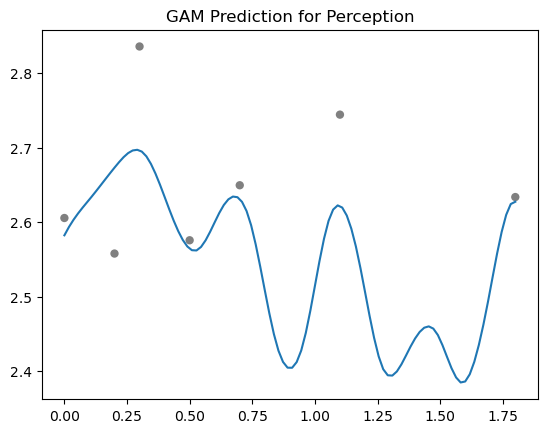

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      1.0215
Link Function:                     IdentityLink Log Likelihood:                                  -339.4288
Number of Samples:                            7 AIC:                                              682.9006
                                                AICc:                                             685.9711
                                                GCV:                                                 0.011
                                                Scale:                                              0.0082
                                                Pseudo R-Squared:                                    0.178
Feature Function                  Lam

/var/folders/mh/myp6j6d523x6nqr_zzg5ctdw0000gn/T/ipykernel_3355/1093989974.py:60: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


Random Forest Mean Squared Error: 0.02618126412773893


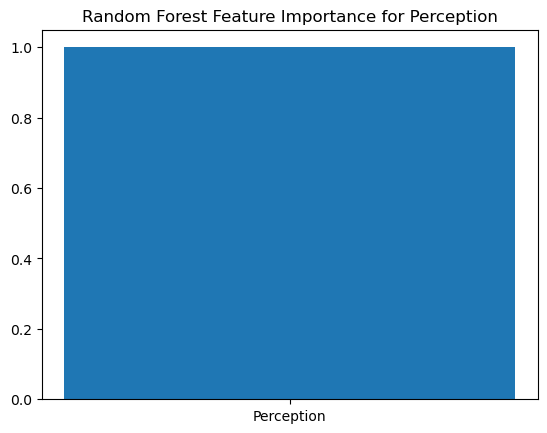



Variable 'AQI PM2.5' not found in the DataFrame. Skipping...
Variable 'Hour' not found in the DataFrame. Skipping...
Variable 'Day' not found in the DataFrame. Skipping...
Variable 'Season' not found in the DataFrame. Skipping...
Variable 'Temperature' not found in the DataFrame. Skipping...
Variable 'Perception' not found in the DataFrame. Skipping...
Analysis for AQI PM2.5:
Descriptive Statistics:
count    100.000000
mean       2.609441
std        0.129406
min        2.250000
25%        2.525005
50%        2.596371
75%        2.713789
max        2.933333
Name: Average Call Count, dtype: float64

Spearman's Correlation: 0.05302746182880701, p-value: 0.6002947906028675
OLS Linear Regression Summary:
                               OLS Regression Results                              
Dep. Variable:     Q("Average Call Count")   R-squared:                       0.024
Model:                                 OLS   Adj. R-squared:                  0.014
Method:                      Least Sq

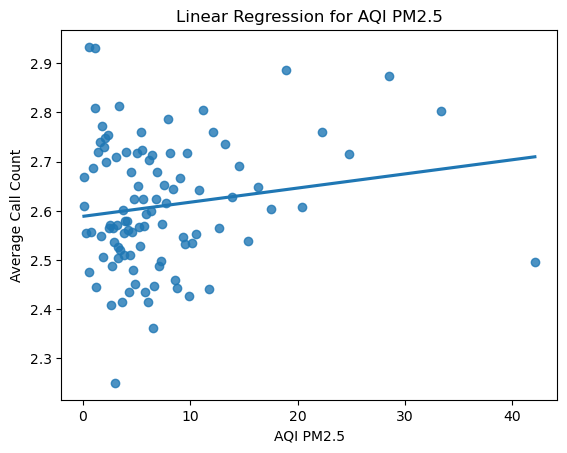

Optimization terminated successfully.
         Current function value: 0.679099
         Iterations 5
OLS Logistic Regression Summary:
                              Logit Regression Results                             
Dep. Variable:     Q("Call Volume Binary")   No. Observations:                  100
Model:                               Logit   Df Residuals:                       98
Method:                                MLE   Df Model:                            1
Date:                     Mon, 10 Jun 2024   Pseudo R-squ.:                 0.02027
Time:                             23:55:41   Log-Likelihood:                -67.910
converged:                            True   LL-Null:                       -69.315
Covariance Type:                 nonrobust   LLR p-value:                   0.09370
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3641  

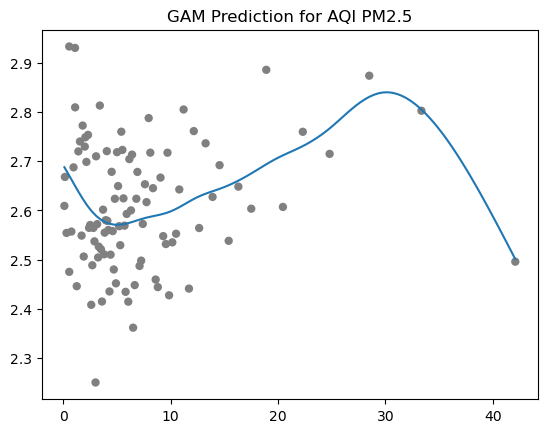

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      8.3677
Link Function:                     IdentityLink Log Likelihood:                                  -2718.463
Number of Samples:                          100 AIC:                                             5455.6615
                                                AICc:                                            5457.8286
                                                GCV:                                                0.0177
                                                Scale:                                               0.015
                                                Pseudo R-Squared:                                   0.1687
Feature Function                  Lam

/var/folders/mh/myp6j6d523x6nqr_zzg5ctdw0000gn/T/ipykernel_3355/1093989974.py:60: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


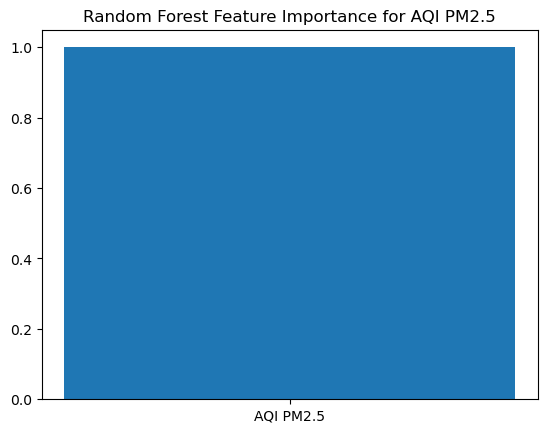

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import spearmanr
from statsmodels.formula.api import ols, logit
from pygam import LinearGAM, s
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

variables = ['Hour', 'Day', 'Season', 'Temperature', 'Perception', 'AQI PM2.5']

for df_result in dfs:
    for variable in variables:
        if variable in df_result.columns:
            print(f"Analysis for {variable}:")

            if df_result[variable].dtype.name == 'category' or df_result[variable].dtype.name == 'object':
                # Cleaning the data to ensure it can be converted to float
                df_result[variable] = df_result[variable].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)

            print("Descriptive Statistics:")
            print(df_result['Average Call Count'].describe())
            print()

            # 1. Spearman's Correlation Analysis
            spearman_corr, spearman_p = spearmanr(df_result[variable], df_result['Average Call Count'])
            print(f"Spearman's Correlation: {spearman_corr}, p-value: {spearman_p}")

            # 2. OLS - Linear Regression
            linear_model = ols(f'Q("Average Call Count") ~ Q("{variable}")', data=df_result).fit()
            print("OLS Linear Regression Summary:")
            print(linear_model.summary())

            # Plot Linear Regression
            plt.figure()
            sns.regplot(x=variable, y='Average Call Count', data=df_result, ci=None)
            plt.title(f'Linear Regression for {variable}')
            plt.show()

            # Transforming Average Call Count for Logistic Regression (e.g., high call volume as 1, low as 0)
            threshold = df_result['Average Call Count'].median()
            df_result['Call Volume Binary'] = (df_result['Average Call Count'] > threshold).astype(int)

            # 3. OLS - Logistic Regression
            logistic_model = logit(f'Q("Call Volume Binary") ~ Q("{variable}")', data=df_result).fit()
            print("OLS Logistic Regression Summary:")
            print(logistic_model.summary())

            # 4. Generalized Additive Model
            gam = LinearGAM(s(0)).fit(df_result[variable].values.reshape(-1, 1), df_result['Average Call Count'])
            XX = gam.generate_X_grid(term=0)
            plt.figure()
            plt.plot(XX, gam.predict(XX))
            plt.scatter(df_result[variable], df_result['Average Call Count'], facecolor='gray', edgecolors='none')
            plt.title(f'GAM Prediction for {variable}')
            plt.show()
            print(gam.summary())

            # 5. Random Forest
            X_train, X_test, y_train, y_test = train_test_split(df_result[[variable]], df_result['Average Call Count'], test_size=0.3, random_state=42)
            rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
            rf_model.fit(X_train, y_train)
            y_pred = rf_model.predict(X_test)
            rf_mse = mean_squared_error(y_test, y_pred)
            print(f"Random Forest Mean Squared Error: {rf_mse}")


            plt.figure()
            plt.bar([variable], rf_model.feature_importances_)
            plt.title(f'Random Forest Feature Importance for {variable}')
            plt.show()

            print("\n" + "="*80 + "\n")
        else:
            print(f"Variable '{variable}' not found in the DataFrame. Skipping...")


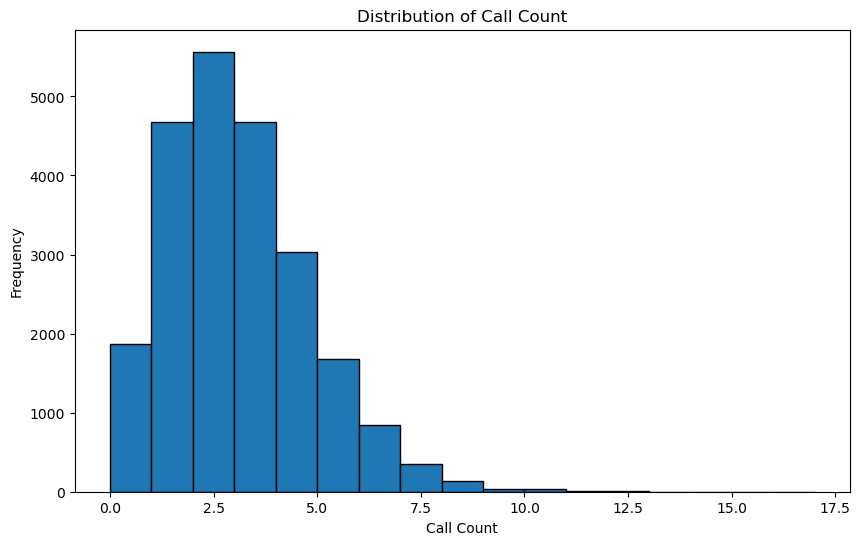

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.hist(df['Call Count'], bins=17, edgecolor='black')
plt.title('Distribution of Call Count')
plt.xlabel('Call Count')
plt.ylabel('Frequency')
plt.show()



In [22]:
print(np.mean(df["Call Count"]))

2.611540308148924


In [23]:
np.std(df["Call Count"])

1.7329289045965817

In [25]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

dependent_var = 'Call Count'
independent_vars = ['Temperature', 'Precipitation', 'Hour', 'Day', 'Season', 'AQI PM2.5']

formula = f'Q("{dependent_var}") ~ ' + ' + '.join([f'Q("{var}")' for var in independent_vars])


model = ols(formula, data=df).fit()


anova_table = sm.stats.anova_lm(model, typ=2)

anova_table_no_residuals = anova_table.drop('Residual')
anova_table_no_residuals['Percentage Variance Explained'] = (anova_table_no_residuals['sum_sq'] / anova_table_no_residuals['sum_sq'].sum()) * 100


print(anova_table_no_residuals)


plt.figure(figsize=(10, 6))
plt.bar(anova_table_no_residuals.index, anova_table_no_residuals['Percentage Variance Explained'])
plt.xlabel('Independent Variables')
plt.ylabel('Percentage Variance Explained')
plt.title('Percentage of Variance in Call Count Explained by Each Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


PatsyError: Error evaluating factor: NameError: no data named 'Precipitation' found
    Q("Call Count") ~ Q("Temperature") + Q("Precipitation") + Q("Hour") + Q("Day") + Q("Season") + Q("AQI PM2.5")
                                         ^^^^^^^^^^^^^^^^^^